# Machine Learning: lidando com dados de muitas dimensões

* Alura Care: Startup fictícia que tem o objetivo de reduzir a quantidade de exames necessários para o diagnóstico de um tipo específico de câncer.

* Cada Feature é uma Dimensão.

* Quanto maior a quantidade de feature, dimensionalidade, mais lento será o processamento.

* A alta dimensionalidade também pode super ajustar os modelos (overfitting).

* Mais features exigem mais espaço de armazenamento.


* Base de Dados: https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv

  * São diversos exames classificados entre dois estados: Malíguino e **B**eníguino.

# Leitura do dataset



In [29]:
import pandas as pd

In [30]:
resultados_exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

In [31]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


* Foram realizados 33 exames em cada indivíduo representado nas entradas do dataset.

## Verificação de valores nulos

In [32]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [33]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [34]:
419/569

0.7363796133567663

* O dataset possui valores vazios na coluna do **exame_33**, cerca de 74% dos dados.

* É uma proporção grande demais para apenas excluírmos as entradas incompletas.

* Portanto, é mais aconselhável excluir a coluna incompleta.

In [35]:
resultados_exames = resultados_exames.drop(columns = ['exame_33'])
resultados_exames.isnull().sum()

id             0
diagnostico    0
exame_1        0
exame_2        0
exame_3        0
exame_4        0
exame_5        0
exame_6        0
exame_7        0
exame_8        0
exame_9        0
exame_10       0
exame_11       0
exame_12       0
exame_13       0
exame_14       0
exame_15       0
exame_16       0
exame_17       0
exame_18       0
exame_19       0
exame_20       0
exame_21       0
exame_22       0
exame_23       0
exame_24       0
exame_25       0
exame_26       0
exame_27       0
exame_28       0
exame_29       0
exame_30       0
exame_31       0
exame_32       0
dtype: int64

* A partir daqui, serão considerados 32 exames de cada indivíduo representado no dataset.

# 1º Modelo: com todos as features do dataset

## Separação do dataset (train e test)

In [36]:
from sklearn.model_selection import train_test_split
from numpy import random

In [37]:
#SEED = 123143
#random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames[['diagnostico']]

In [38]:
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3, random_state = 27)

## Modelo Random Forest

* Semelhante ao **Árvore de Decisão**, mas utiliza várias árvores.

In [39]:
from sklearn.ensemble import RandomForestClassifier

* **n_estimators**: quantas árvores de decisão serão construídas no modelo
  * o padrão é 100

In [40]:
model = RandomForestClassifier(random_state = 27)
model.fit(treino_X, treino_y.values.ravel())

score = model.score(teste_X, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')

Taxa de acerto da classificação (Random Forest): 95.91%


# 2º Modelo: Baseline (Dummy Classifier)

* Este modelo será o baseline de referência enquanto a quantidade de features estiverem sendo reduzidas.

In [41]:
from sklearn.dummy import DummyClassifier

#SEED = 123143
#random.seed(SEED)

* O **Dummy Classifier** com estratégia de **maior frequência** encontra a classe que mais ocorre do dataset treino (train y) e classifica todas entradas como se fizessem parte desta classe.

* A taxa de acerto estará diretamente relacionada à proporção de vezes que a classe mais frequente ocorre no dataset.

In [42]:
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state = 27) # classifica tudo com a classe de maior frequência (no mínimo, será tão ruim quanto um aleatório)
dummy_model.fit(treino_X, treino_y)

score = dummy_model.score(teste_X, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Dummy: {score*100:.2f}%')

Taxa de acerto da classificação (Dummy: 60.82%


# Análise do comportamento das variáveis (classes: B e M)

* Esta análise precisa dos valores de cada um dos exames separados pela classificação que foi feita em cada indivíduo. Entretanto, saber os resultados dos exames de cada um dos indivíduos (entradas do dataset) não é importante.

* Sendo assim, os ids das entradas serão dispensadas e os trios [classe, exame_x, valor observado no exame] serão separados para geração de um gráfico (violin plot). 

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

* Para melhorar a visualização, os dados serão normalizados.

* Dados numéricos com valores muito amplos as vezes distorcem a visualização e atrapalha a análise de suas proporções em comparação com valores baixos.
  * Por exemplo: um dos exames pode aparesentar valores de 0 a 2500, enquanto os outros vão de 0 a 50. Os exames do segundo caso ficariam insignificantes em comparação com o primeiro caso, mas ainda seriam de extrema importância para identificação de uma doença.

* O Standard Scaler padroniza os dados de acordo com uma função matemática ( $Z = (X - u)/S $ ) que limita os valores máximo e mínimo, e distribui os valores do meio ao longo do intervalo.

In [44]:
padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_normalizados = padronizador.transform(valores_exames)
valores_exames_normalizados = pd.DataFrame(data = valores_exames_normalizados, columns = valores_exames.keys())

valores_exames_normalizados

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


In [45]:
#dados_plot = pd.concat([diagnostico, valores_exames_normalizados.iloc[:, :10]], axis = 1)
dados_plot = pd.concat([diagnostico, valores_exames_normalizados], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297
...,...,...,...
18203,M,exame_32,-0.709091
18204,M,exame_32,-0.973978
18205,M,exame_32,-0.318409
18206,M,exame_32,2.219635


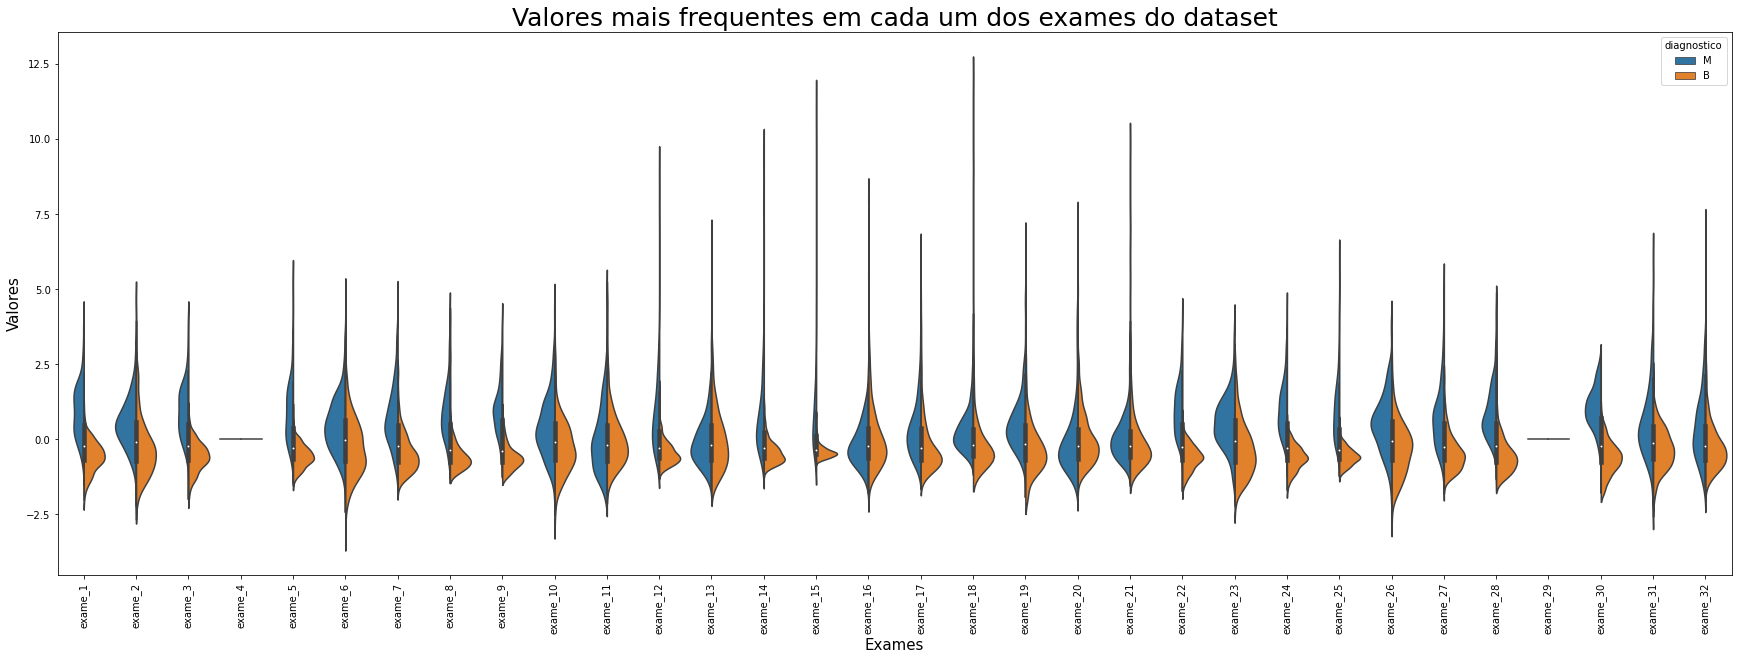

In [46]:
#plt.figure(figsize = (10,10))
plt.figure(figsize = (30,10))

ax = sns.violinplot(x = 'exames', y = 'valores', data = dados_plot, hue = 'diagnostico', split = True)

ax.set_title('Valores mais frequentes em cada um dos exames do dataset', fontsize = 25)
ax.set_xlabel('Exames', fontsize = 15)
ax.set_ylabel('Valores', fontsize = 15)

plt.xticks(rotation = 90)

plt.show()

* O exame_4 e o exame_29 têm um comportamento semelhante e muito diferente dos outros, neles não há variações visíveis nos valores.

* As partes mais largas dos gráficos simbolizam os valores que mais ocorrem em um determinado exame.

* Exames em que os picos das duas ondas estão distantes (por exemplo, no exame_1) indicam que estes exames podem ser bons parâmetros a serem analisados para classificar um tumor entre maligno ou benigno (M ou B).

* Exames com os picos alinhados (por exemplo, o exame_16) dificilmente serão relevantes na classificação. O mesmo ocorre com os exames de valores constantes, sem variação aparente (por exemplo, os exames 4 e 29).

In [47]:
val_exame_4 = valores_exames['exame_4'].unique()
print(f'Valores presentes no exame_4: {val_exame_4}')

val_exame_29 = valores_exames['exame_29'].unique()
print(f'Valores presentes no exame_29: {val_exame_29}')

Valores presentes no exame_4: [103.78]
Valores presentes no exame_29: [0.786]


## Remoção de exames com valores constantes

In [48]:
valores_exames_relevantes = valores_exames.drop(columns = ['exame_4', 'exame_29'])
valores_exames_relevantes

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 3º Modelo: Randon Forest sem features de valores constantes

* Os exames em que todos os indivíduos tinham taxas exatamente iguais foram removidos, pois não contribuem e podem atrapalhar uma classificação correta.

In [49]:
#valores_exames = valores_exames_relevantes.drop(columns = ['id', 'diagnostico'])
#diagnostico = valores_exames_relevantes[['diagnostico']]

treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_relevantes, diagnostico, test_size = 0.3, random_state = 27)

model = RandomForestClassifier(random_state = 27)
model.fit(treino_X, treino_y.values.ravel())

score = model.score(teste_X, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')
print('> Sem exames de valores constantes')

Taxa de acerto da classificação (Random Forest): 96.49%
> Sem exames de valores constantes


* Utilizando todos os exames com valores válidos, foi encontrada uma taxa de acerto de aproximadamente *95.91%*. Removendo-se os exames de valores contantes, houve uma taxa de acerto de aproxamadamente *96.49%*, um **aumento de 0.58%**.

# Matriz de Correlação

* Correlação não implica em Causalidade
  * Variáveis com comportamentos semelhantes (alta correlação) não serão, necessariamente, causa uma da outra.

## Básico

In [50]:
#valores_exames_relevantes.corr()

## Mapa de Calor

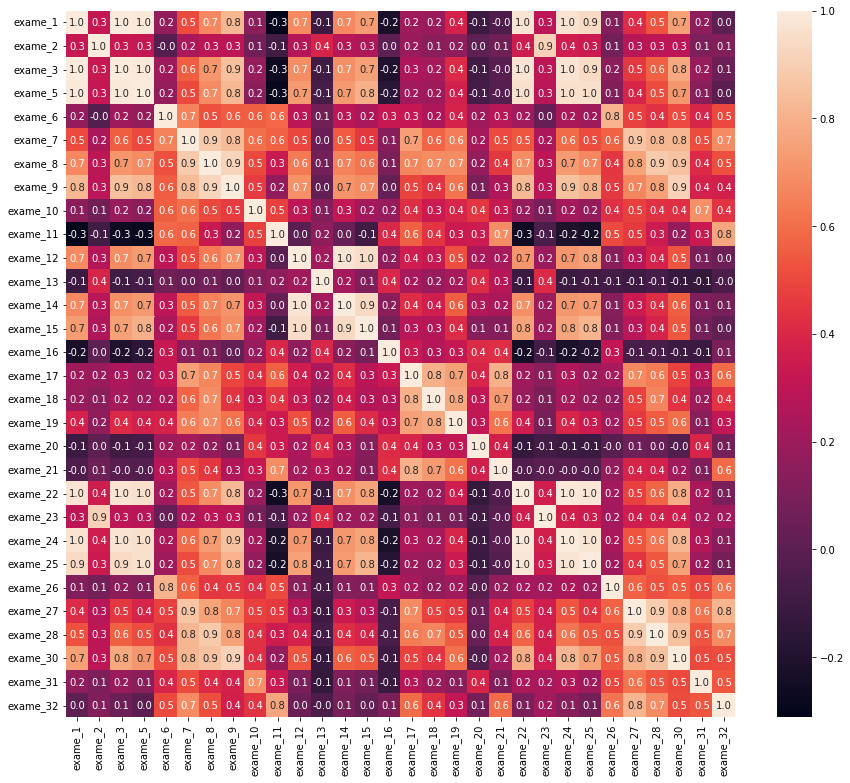

In [51]:
matriz_correlacao = valores_exames_relevantes.corr()

plt.figure(figsize = (15,13))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')
plt.show()

* Duplas de variáveis com **correlaçõe muito alta** ($\ge$ 0.99) podem ter um dos seus itens removidos do dataset.

* Variáveis com alta correlação terão influências muito parecidas quando consideradas em qualquer equação. Ou seja, suas influências serão redundantes.

* **Remover variáveis rendundantes** ajuda tanto nos cálculos, por ter menos variáveis a serem calculadas, quanto no rendimento de todo o modelo, melhorando ou mantendo a taxa de acerto.

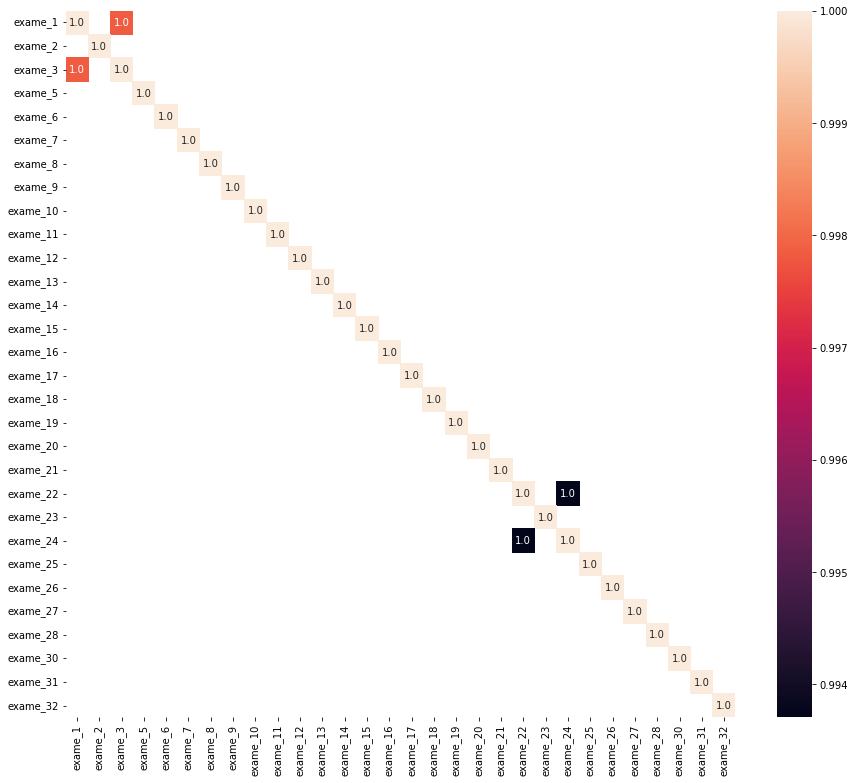

In [52]:
#matriz_correlacao[matriz_correlacao > 0.99]
#matriz_correlacao[matriz_correlacao > 0.99].sum()

plt.figure(figsize = (15,13))
sns.heatmap(matriz_correlacao[matriz_correlacao > 0.99], annot = True, fmt = '.1f')
plt.show()

In [53]:
altas_correlacoes = matriz_correlacao[matriz_correlacao > 0.99].sum()
variaveis_correlacao_alta = altas_correlacoes[altas_correlacoes > 1.0]
variaveis_correlacao_alta

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

* As variáveis consideradas altamente correlacionadas foram: exame_1 com exame_3, exame_22 com exame_24.

* Neste experimento, foram escolhidos para serem mantidos os exames com índices mais baixos de cada dupla (1 e 22).

In [54]:
# valores_exames_relevantes_correlacao -> Dataset após as remoções: coluna com muitos valores NaN, colunas cujos valores não variavam, colunas com correlação maior que 0.98

valores_exames_relevantes_correlacao = valores_exames_relevantes.drop(columns = ['exame_3', 'exame_24'])
valores_exames_relevantes_correlacao

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 4º Modelo: Randon Forest sem features de valores constantes e sem altas correlações

In [55]:
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_relevantes_correlacao, diagnostico, test_size = 0.3, random_state = 27)

model = RandomForestClassifier(random_state = 27)
model.fit(treino_X, treino_y.values.ravel())

score = model.score(teste_X, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')
print('> Sem exames de valores constantes, sem exames de alta correlação')

Taxa de acerto da classificação (Random Forest): 97.08%
> Sem exames de valores constantes, sem exames de alta correlação


* O 4º Apresentou uma maior taxa de acerto em comparação com os anteriores, **97.08%**.

* Neste novo classificador, houve um aumento de aproximadamente *0.59%* em relação ao 3º Modelo, e um aumento de aproximadamente *1.17%* em relação ao 1º Modelo.

## Matriz de Confusão

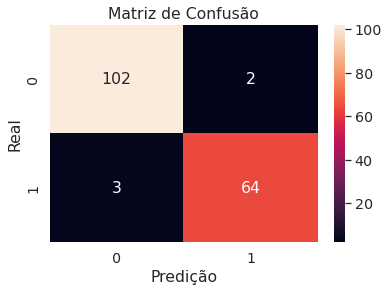

In [56]:
from sklearn.metrics import confusion_matrix

predicted_y = model.predict(teste_X)
matriz_confusao = confusion_matrix(teste_y, predicted_y)

sns.set(font_scale = 1.3)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real', title = 'Matriz de Confusão')
plt.show()

# Select K Best: seleção automática das K features mais promissoras

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

* Seleciona as K variáveis mais promissoras, mis representativas para o processo de classificação, de acordo com uma função que as avalia.
  * O $\chi^2$ avalia se duas distribuições são estatisticamente iguais. Não aceita valores negativos.

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Para não haverem valores negativos, é necessário retornar ao dataset antes da normalização e remover novamente as features com problemas encontrados
valores_exames_selecao = valores_exames.drop(columns = ['exame_4', 'exame_29', 'exame_3', 'exame_24'])
#alores_exames_selecao

kmelhores_selecionadas = SelectKBest(chi2, k = 5)
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_selecao, diagnostico, test_size = 0.3, random_state = 27)

kmelhores_selecionadas.fit(treino_X, treino_y)

# Variáveis de treino selecionadas pelo modelo (K Best)
treino_kBest = kmelhores_selecionadas.transform(treino_X)
teste_kBest = kmelhores_selecionadas.transform(teste_X)

* Os dados de treino e teste foram filtrados pelo K Best. Agora há novos conjuntos de treino e teste para serem usados no 5º Modelo.

In [58]:
teste_kBest.shape

(171, 5)

# 5º Modelo: Randon Forest com variáveis filtradas e com 5 features mais promissoras segundo o KBest 

In [59]:
model = RandomForestClassifier(random_state = 27)
model.fit(treino_kBest, treino_y.values.ravel())

score = model.score(teste_kBest, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')
print('> Com 5 features mais promissoras (KBest)')

Taxa de acerto da classificação (Random Forest): 91.81%
> Com 5 features mais promissoras (KBest)


* A taxa de acerto deste modelo foi menor que alguns dos anteriores, mas ainda tem uma taxa de acerto alta que pode ser relevante.

* Além disso, o custo em se coletar 33 exames foi reduzido para 5 exames.

# Matriz de Confusão

* Matriz de Falsos Positivos e Negativos, e Verdadeiros Positivos e Negativos.

In [60]:
predicted_y = model.predict(teste_kBest)
matriz_confusao = confusion_matrix(teste_y, predicted_y)

matriz_confusao

array([[102,   2],
       [ 12,  55]])

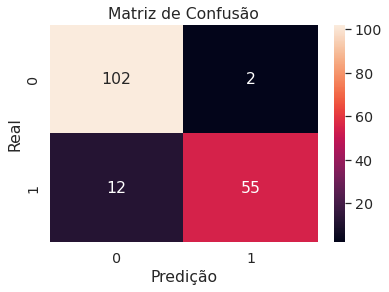

In [61]:
sns.set(font_scale = 1.3)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real', title = 'Matriz de Confusão')
plt.show()

* 0: Câncer bengno; 1: Câncer maligno

* No dataset, há 104 casos de câncer benigno e 67 casos de câncer maligno.
  * De 104 casos de câncer benigno, o último modelo acertou 102.
  * de 67 casos de cânce maligno, o último modelo acertou 55.

* Em doenças graves como câncer, tanto os falsos positivos quanto os falsos negativos são prejudiciais, pois a descoberta precoce é extremamente importante pra cura e o tratamento tem muitos efeitos colaterais que podem deixas sequelas.

# RFE (Recursive Features Elimination) - Select K Best: seleção automática de features com RFE

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

* n_features_to_select: Quantidade de variáveis para serem selecionadas
* step: Quantidade de passos que o algoritmo recursivo vai dar, padrão = 1
* estimator: estimador (modelo que será utlizado depois)

In [62]:
from sklearn.feature_selection import RFE

treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_relevantes_correlacao, diagnostico, test_size = 0.3, random_state = 27)

classificador = RandomForestClassifier(random_state = 27)
classificador.fit(treino_X, treino_y.values.ravel())

rfe_selecionadas = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
rfe_selecionadas.fit(treino_X, treino_y.values.ravel())

treino_rfe = rfe_selecionadas.transform(treino_X)
teste_rfe = rfe_selecionadas.transform(teste_X)

# 6º Modelo: Randon Forest com variáveis filtradas e com 5 features mais promissoras segundo o RFE 

In [63]:
model = RandomForestClassifier(random_state = 27)
model.fit(treino_rfe, treino_y.values.ravel())

score = model.score(teste_rfe, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')
print('> Com 5 features mais promissoras (RFE)')

Taxa de acerto da classificação (Random Forest): 95.32%
> Com 5 features mais promissoras (RFE)


* A taxa de acerto do modelo com variáveis escolhidas pelo RFE foi maior do que com as escolhas do KBest, mas ainda está menor do que a taxa de acerto do 4º Modelo.

## Matriz de Confusão

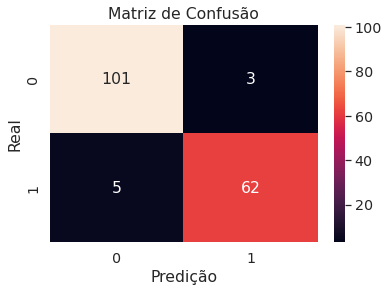

In [64]:
predicted_y = model.predict(teste_rfe)
matriz_confusao = confusion_matrix(teste_y, predicted_y)

sns.set(font_scale = 1.3)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real', title = 'Matriz de Confusão')
plt.show()

* No dataset, há 104 casos de câncer benigno e 67 casos de câncer maligno.
  * De 104 casos de câncer benigno, o último modelo acertou 101.
  * de 67 casos de câncer maligno, o último modelo acertou 62.

* Este último modelo acertou mais que o anterior nas predições de câncer maligno, ou seja, teve menos falsos positivos. Entretanto, teve um falso negativo a mais.

# RFE Cross Validation

* Aplica o RFE em blocos de dados do dataset. Seleciona quantas e quais *features* são necessárias para gerar os melhores resultados.

* A quantidade de blocos, estimador que avalia a importância das *features*, e a métrica que será medida são passados por parâmetro.

In [65]:
from sklearn.feature_selection import RFECV

treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_relevantes_correlacao, diagnostico, test_size = 0.3, random_state = 27)

classificador = RandomForestClassifier(random_state = 27)
classificador.fit(treino_X, treino_y.values.ravel())

rfecv_selecionadas = RFECV(estimator = classificador, cv = 5, step = 1, scoring = 'accuracy')
rfecv_selecionadas.fit(treino_X, treino_y.values.ravel())

treino_rfecv = rfecv_selecionadas.transform(treino_X)
teste_rfecv = rfecv_selecionadas.transform(teste_X)

## Analisando features escolhidas

### Quantidade e Nomes das variáveis

In [66]:
rfecv_selecionadas.n_features_

15

In [67]:
rfecv_selecionadas.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [68]:
features_selecionadas = treino_X.columns[rfecv_selecionadas.support_]
features_selecionadas

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_12',
       'exame_15', 'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

In [69]:
print(f'A quantidade de features selecionadas foi de {features_selecionadas.size}, originalmente eram {treino_X.columns.size} features.')

A quantidade de features selecionadas foi de 15, originalmente eram 28 features.


### Pontuações

**cv_results_** dict of ndarrays

A dict with keys:

* **mean_test_scorendarray** of shape (n_subsets_of_features,)
  * Mean of scores over the folds.
  * Média das k divisões feitas no dataset.

* **std_test_scorendarray** of shape (n_subsets_of_features,)
  * Standard deviation of scores over the folds.
  
* **split(k)_test_scorendarray** of shape (n_subsets_of_features,)
  * The cross-validation scores across (k)th fold.
  * k arrays com a acurácia encontrada em cada subset. Cada valor indica a acurácia à medida que a quantidade de features aumenta.

In [70]:
rfecv_selecionadas.cv_results_

{'mean_test_score': array([0.88446203, 0.93968354, 0.94224684, 0.9271519 , 0.9371519 ,
        0.9346519 , 0.94218354, 0.94727848, 0.94727848, 0.94977848,
        0.95981013, 0.95727848, 0.95481013, 0.96234177, 0.96484177,
        0.95981013, 0.95224684, 0.95481013, 0.96231013, 0.96234177,
        0.96231013, 0.95731013, 0.96231013, 0.95981013, 0.96234177,
        0.95734177, 0.94977848, 0.96231013]),
 'std_test_score': array([0.02130534, 0.01469098, 0.00981319, 0.0146169 , 0.01398627,
        0.01479443, 0.01516269, 0.01456982, 0.01836518, 0.01770275,
        0.01460127, 0.01707952, 0.01867614, 0.01111116, 0.00931391,
        0.01227587, 0.01230292, 0.01867614, 0.01125373, 0.01111116,
        0.01772417, 0.01499159, 0.01369504, 0.01839013, 0.01111116,
        0.00984254, 0.01360892, 0.00790911]),
 'split0_test_score': array([0.85  , 0.925 , 0.925 , 0.9125, 0.9375, 0.925 , 0.925 , 0.9375,
        0.925 , 0.925 , 0.9375, 0.9375, 0.925 , 0.95  , 0.95  , 0.95  ,
        0.9375, 0.925 , 0.

In [71]:
# Acurácia à medida que a quantidade de features aumenta
rfecv_selecionadas.cv_results_['mean_test_score']

array([0.88446203, 0.93968354, 0.94224684, 0.9271519 , 0.9371519 ,
       0.9346519 , 0.94218354, 0.94727848, 0.94727848, 0.94977848,
       0.95981013, 0.95727848, 0.95481013, 0.96234177, 0.96484177,
       0.95981013, 0.95224684, 0.95481013, 0.96231013, 0.96234177,
       0.96231013, 0.95731013, 0.96231013, 0.95981013, 0.96234177,
       0.95734177, 0.94977848, 0.96231013])

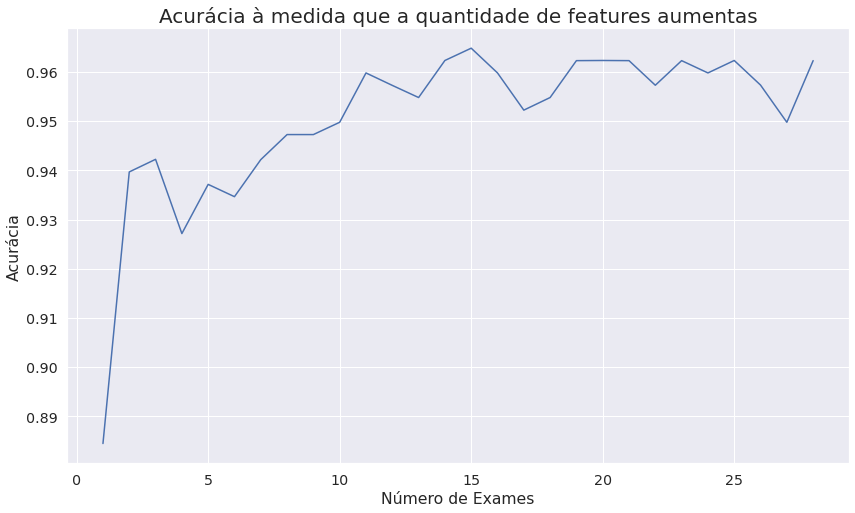

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.title('Acurácia à medida que a quantidade de features aumentas', fontsize = 20)

plt.plot(range(1, len(rfecv_selecionadas.cv_results_['mean_test_score'])+1), rfecv_selecionadas.cv_results_['mean_test_score'])
plt.show()

* O pico do gráfico está em 15 features, que foi a quantidade escolhida pelo RFECV.

# 7º Modelo: Randon Forest com variáveis filtradas e com features mais promissoras segundo o RFECV

In [73]:
model = RandomForestClassifier(random_state = 27)
model.fit(treino_rfecv, treino_y.values.ravel())

score = model.score(teste_rfecv, teste_y.values.ravel())
print(f'Taxa de acerto da classificação (Random Forest): {score*100:.2f}%')
print('> Com features mais promissoras (RFECV)')

Taxa de acerto da classificação (Random Forest): 97.08%
> Com features mais promissoras (RFECV)


* A taxa de acerto foi semelhante à do 4º modelo. Os dois foram os mais bem pontuados até agora.

## Matriz de Confusão

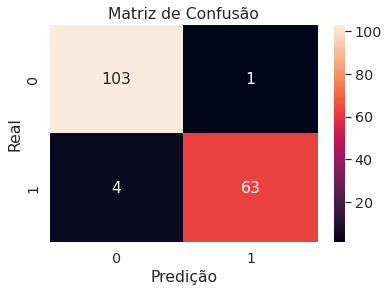

In [74]:
predicted_y = model.predict(teste_rfecv)
matriz_confusao = confusion_matrix(teste_y, predicted_y)

sns.set(font_scale = 1.3)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real', title = 'Matriz de Confusão')
plt.show()

* No dataset, há 104 casos de câncer benigno e 67 casos de câncer maligno.
  * De 104 casos de câncer benigno, o último modelo acertou 103.
  * de 67 casos de câncer maligno, o último modelo acertou 63.

* Os resultados dos dois modelos estão muito próximos. A escolha vai depender do custo (quantidade de *features*/exames) de cada um e da importância que seria dada a falsos negativos e falsos positivos.
  * Essa diferença pode ser estatisticamente irrelevante.
  * Um conjunto de dados maior pode aumentar ou diminuir a diferença entre os dois modelos.

# Visualização das 2 melhores features (RFE)

In [75]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [76]:
from sklearn.feature_selection import RFE

treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_relevantes_correlacao, diagnostico, test_size = 0.3, random_state = 27)

classificador = RandomForestClassifier(random_state = 27)
classificador.fit(treino_X, treino_y.values.ravel())

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_X, treino_y.values.ravel())

treino_rfe = selecionador_rfe.transform(treino_X)
teste_rfe = selecionador_rfe.transform(teste_X)

In [77]:
valores_exames_rfe2 = selecionador_rfe.transform(valores_exames_relevantes_correlacao)
valores_exames_rfe2.size

1138

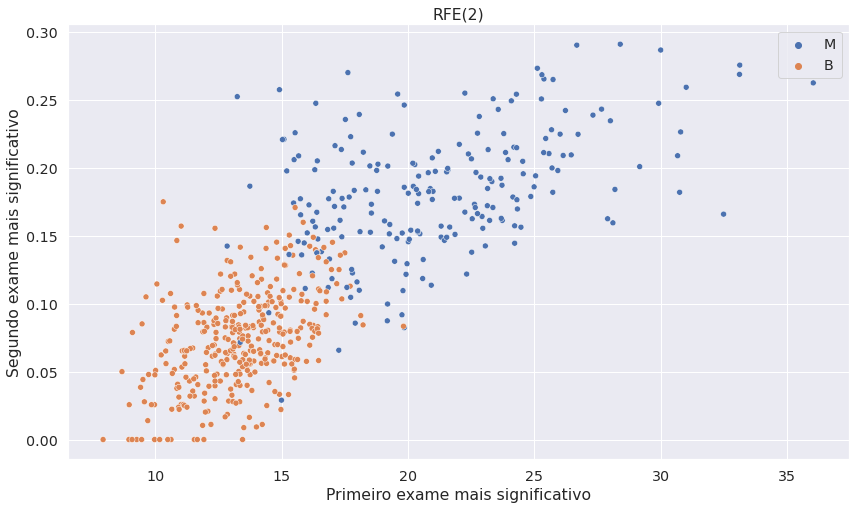

In [78]:
import seaborn as sns

plt.figure(figsize = (14,8))
plt.xlabel('Primeiro exame mais significativo')
plt.ylabel('Segundo exame mais significativo')
plt.title('RFE(2)')

# x = todas as linhas, primeira coluna (melhor feature)
# y = todas as linhas, segunda coluna (segunda melhor feature)
sns.scatterplot(x = valores_exames_rfe2[:,0], y = valores_exames_rfe2[:,1], hue = diagnostico.values.ravel())

plt.show()

* Considerar apenas duas features causa muita perda de informação.

# Visualização em duas dimensões

> Ao se utilizar as técnicas de seleção de features para gerar uma visualização no plano, é preciso escolher dois dos atributos para representar os dados. Manter apenas dois dos diversos atributos, faz com que um grande número de informação seja perdida, resultado em visualizações que podem induzir à conclusões equivocadas."

> Para gerar uma visualização no plano, o ideal é utilizar técnicas que tentam preservar o maior número possível de informação em uma dimensão reduzida, como PCA e T-SNE.

Citações diretas do material do curso.

# PCA (Principal Component Analysis)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* Prioriza variáveis que contêm maior volume de informações sobre os dados através de transformações matemáticas.

* Funciona melhor com os dados normalizados.

In [79]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_relevantes_correlacao)
valores_exames_filtrados_normalizados = padronizador.transform(valores_exames_relevantes_correlacao)
valores_exames_filtrados_normalizados = pd.DataFrame(data = valores_exames_filtrados_normalizados, columns = valores_exames_relevantes_correlacao.keys())

valores_exames_filtrados_normalizados

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [80]:
from sklearn.decomposition import PCA

# n_components = número de variáveis que serão retornadas
pca = PCA(n_components = 2)
valores_exames_pca2 = pca.fit_transform(valores_exames_filtrados_normalizados)
valores_exames_pca2

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

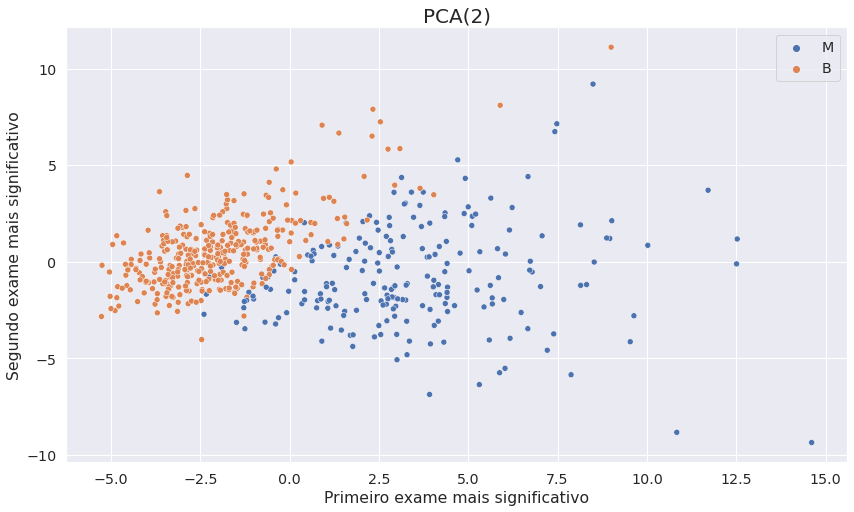

In [81]:
import seaborn as sns

plt.figure(figsize = (14,8))
plt.xlabel('Primeiro exame mais significativo')
plt.ylabel('Segundo exame mais significativo')
plt.title('PCA(2)', fontsize = 20)

# x = todas as linhas, primeira coluna (melhor feature)
# y = todas as linhas, segunda coluna (segunda melhor feature)
sns.scatterplot(x = valores_exames_pca2[:,0], y = valores_exames_pca2[:,1], hue = diagnostico.values.ravel())

plt.show()

* É possível visualizar uma curva que poderia dividir os tipo de câncer de uma forma um pouco melhor que a anterior (RFE).

* Ainda assim, 2 features descrevem muito pouco os dados.

# TSNE (T-distributed Stochastic Neighbor Embedding)

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

> It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

* Cada entrada do dataset será um ponto em um espaço n-dimensional (neste caso, em 28 dimensões).

* O TSNE usa um processo de agrupamento semelhante ao KNN, utilizando uma conversão das n-dimensões para 2 dimensões para calcular as distâncias.

* Também se comporta melhor com valores normalizados.

* É mais lento que o PCA, pode ter um custo computacional mais alto dependendo do tamanho da base de dados.

In [82]:
from sklearn.manifold import TSNE

# n_components = número de variáveis que serão retornadas
tsne = TSNE(n_components = 2)
valores_exames_tsne2 = tsne.fit_transform(valores_exames_filtrados_normalizados)
valores_exames_tsne2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-19.48781  , -23.76806  ],
       [ -3.2013326, -17.912252 ],
       [-13.536171 , -20.776558 ],
       ...,
       [  2.189205 , -12.458697 ],
       [-17.465181 , -18.914316 ],
       [ 20.087257 ,  17.517906 ]], dtype=float32)

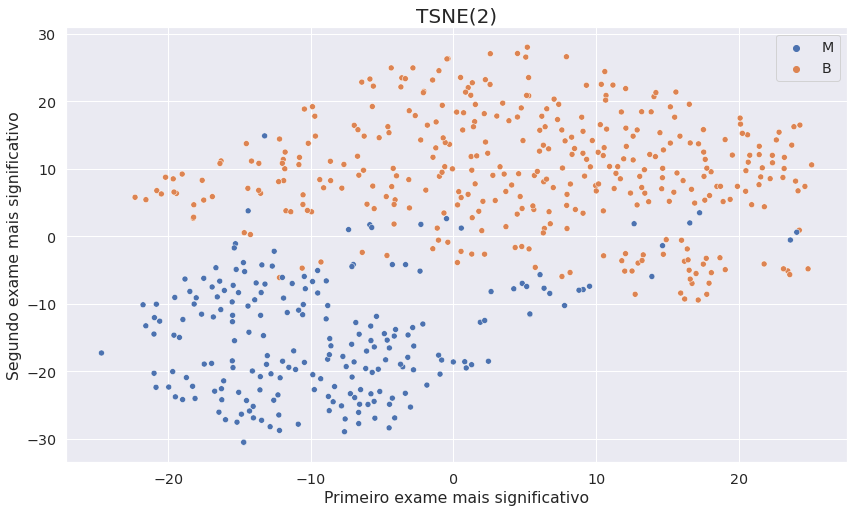

In [83]:
plt.figure(figsize = (14,8))
plt.xlabel('Primeiro exame mais significativo')
plt.ylabel('Segundo exame mais significativo')
plt.title('TSNE(2)', fontsize = 20)

# x = todas as linhas, primeira coluna (melhor feature)
# y = todas as linhas, segunda coluna (segunda melhor feature)
sns.scatterplot(x = valores_exames_tsne2[:,0], y = valores_exames_tsne2[:,1], hue = diagnostico.values.ravel())

plt.show()

* A fronteira entre os dois tipos de câncer é um pouco mais visível.

# Redução de Dimensionalidade x Seleção de Features

* A seleção de features funciona como um filtro, selecionando variáveis do dataset que pareçam mais promissoras para aumentar a taxa de acerto do modelo.

* A redução de dimensionalidade escolhe quais das features selecionadas serão mantidas, e só então reduz as dimensões dos dados.